# Part II - Ford GoBike System
## by Nonso Ukwuma

## Investigation Overview

This presentation will look at the relationship between the bike share for all trips user segment and the member age, member gender and user type. The relationships between these 3 categorical variables and 1 numeric variable will be used to establish the characteristics of the bike share users who either use the bike share service for all trips or those that do not use the servcie for all trip.



## Dataset Overview

This data set contains information about individual rides made in a bike sharing system covering the greater San Francisco Bay area over a certain period. The dataset contains over 183k records and has details of each ride such as the gender of the rider, the year of birth, destination, duration of trip, user type etc. Prior to exploration of the data, I created a member_age and duration_hours columns to aid my exploratory data analysis. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bikeshare = pd.read_csv('bikeshare-tripdata.csv')

### Preliminary Data Wrangling

In [4]:
#drop null and empty rows

bikeshare.dropna(inplace=True)

In [5]:
#change the data type for the member_birth_year column to Int

bikeshare['member_birth_year'] = bikeshare['member_birth_year'].astype('str')
bikeshare['member_birth_year'] = bikeshare['member_birth_year'].str.split('.', expand = True).get(0).astype('int')

In [6]:
#create a member_age column from the member_birth_year column details and limit rider age to 100 yrs

from datetime import date

bikeshare['member_age'] = date.today().year - bikeshare['member_birth_year']

bikeshare = bikeshare[bikeshare['member_age'] <= 100]

In [7]:
#Remove 'Other' gender from the member_gender column and retain only records where the gender is male or female.

bikeshare = bikeshare[bikeshare['member_gender'] != 'Other']

In [8]:
#Create a column for duration_hours from the duration_sec column.

bikeshare['duration_hours'] = round(bikeshare['duration_sec']/3600, 2)

In [9]:
#drop columns that will not be required for the analysis.

dcols = ['start_station_id', 'end_station_id', 'end_station_latitude', 'start_station_latitude', 
         'start_station_longitude', 'end_station_longitude', 'start_time', 'end_time']
bikeshare.drop(dcols, axis=1, inplace=True)

In [10]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171231 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             171231 non-null  int64  
 1   start_station_name       171231 non-null  object 
 2   end_station_name         171231 non-null  object 
 3   bike_id                  171231 non-null  int64  
 4   user_type                171231 non-null  object 
 5   member_birth_year        171231 non-null  int64  
 6   member_gender            171231 non-null  object 
 7   bike_share_for_all_trip  171231 non-null  object 
 8   member_age               171231 non-null  int64  
 9   duration_hours           171231 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 14.4+ MB


## Distribution of Bike Share Users along Key Segments.

The bike share service users are classified under 3 major categories by "Gender", "User Type" and "Bike Share for all trips. The gender categorization shows that majority of the users were males while the user type category showed that there were more subscribers than customers however the category for bike share for all trips shows that majority of the users do not use the service for all trips.

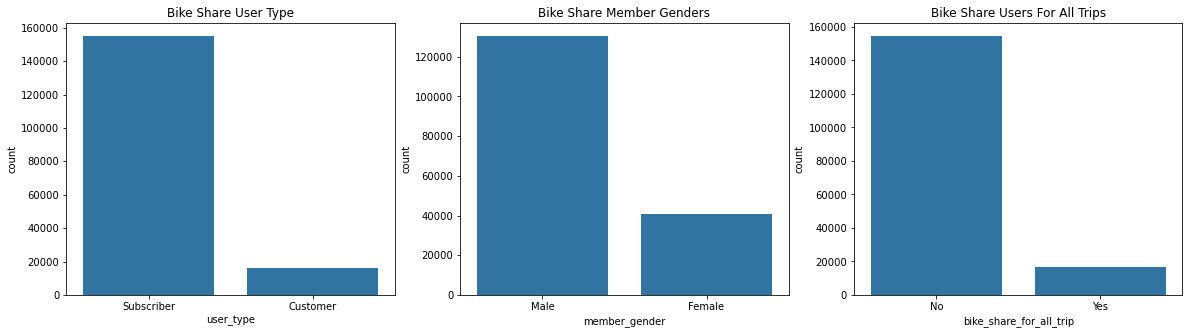

In [13]:
#create a function to plot categorical univariate charts
def cplot(dat, ft):
    col = sb.color_palette()[0]
    sb.countplot(data=dat, x=dat[ft], color= col, order=dat[ft].value_counts().index);
    
plt.figure(figsize = [20, 5])

plt.subplot(1,3,1)
cplot(bikeshare, 'user_type')
plt.title('Bike Share User Type')

plt.subplot(1,3,2)
cplot(bikeshare, 'member_gender')
plt.title('Bike Share Member Genders')

plt.subplot(1,3,3)
cplot(bikeshare, 'bike_share_for_all_trip')
plt.title('Bike Share Users For All Trips');

## Age Distribution of the bike share users

The bike share service users had ages ranging from 21yrs to 90yrs plus. The distribution shows that majority of the users were between the ages of 24yrs and 43yrs.

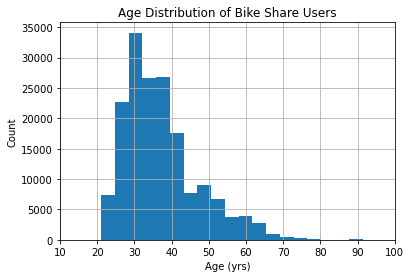

In [14]:
bikeshare.member_age.hist(bins=20)
plt.xlim([10, 100])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.xticks(np.arange(10, 101, 10))
plt.title('Age Distribution of Bike Share Users');

## Age Distribution of Different Customer Categories.

We further investigate the age distribution of the different customer categories to identify which age bracket is dominant in each category.

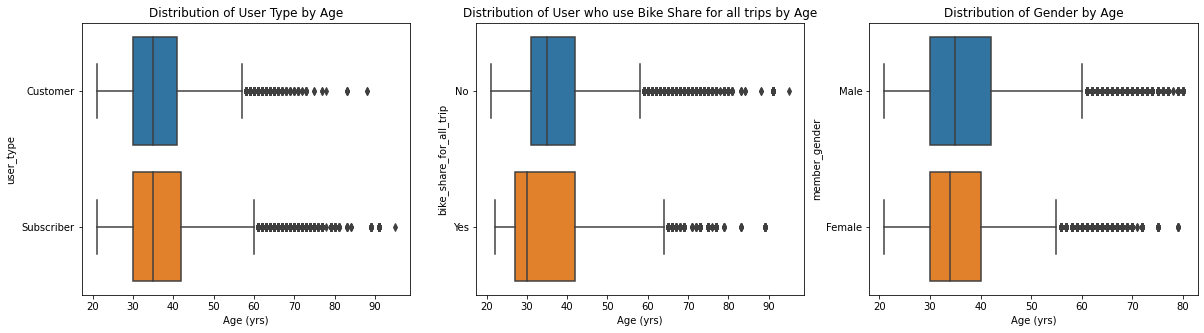

In [15]:
plt.figure(figsize = [20, 5])

plt.subplot(1,3,1)
sb.boxplot(data=bikeshare, y=bikeshare.user_type, x=bikeshare.member_age);
plt.title('Distribution of User Type by Age')
plt.xlabel('Age (yrs)');

plt.subplot(1,3,2)
sb.boxplot(data=bikeshare, x=bikeshare.member_age, y=bikeshare.bike_share_for_all_trip);
plt.title('Distribution of User who use Bike Share for all trips by Age')
plt.xlabel('Age (yrs)');

plt.subplot(1,3,3)
sb.boxplot(data=bikeshare[bikeshare['member_age'] <= 80], x='member_age', y='member_gender'); 
plt.title('Distribution of Gender by Age')
plt.xlabel('Age (yrs)');

## Distribution of Member Age by Gender and Usage Pattern
The distribution shows that the majority of the users who do not use the bike share service fall between the age range of 30-41yrs while majority of the users under the age of 30yrs used the bike share service for all trips.


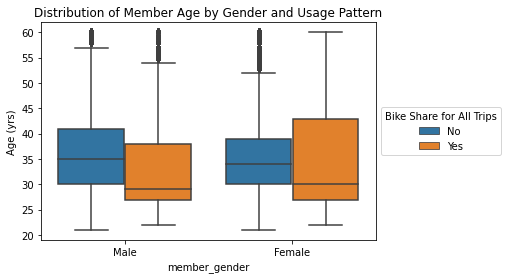

In [16]:
bage = bikeshare[bikeshare['member_age'] <= 60]
sb.boxplot(data = bage, x = 'member_gender', y = 'member_age', hue = 'bike_share_for_all_trip')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Bike Share for All Trips'); 
plt.ylabel('Age (yrs)')
plt.title('Distribution of Member Age by Gender and Usage Pattern');

In [18]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 648472 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
